**Assignment 8.1 : Saving Models**

Name: Ignacio, Edrie<br>
Course and Section: CPE019 - CPE32S1<br>
Date of Submission: 07/06/2024<br>
Instructor: Engr. Roman M. Richard<br>

# **1.) Choose any dataset applicable to either a classification problem or a regression problem.**


In [ ]:
import numpy as np
import pandas as pd
import cv2

- Import the libraries to read the dataset

In [ ]:
df = pd.read_csv("HeartDisease.csv")

df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

# **2.) Explain your datasets and the problem being addressed.**


The dataset that I have chosen for this is the HeartDisease dataset. I chose this in order to evaluate its validity as the publisher claims it to be the largest heart disease dataset which is combined from 5 other similar datasets. If this dataset's accuracy is high, I will use it for the exercises in this assignment which is loading, saving, and etc for models.

# **3.) Show evidence that you can do the following:**




---



3.1) Save a model in HDF5 format


In [ ]:
pip install h5py

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]


In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))




---



3.2) Save a model and load the model in a JSON format

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model.h5")
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model.h5")
print("Loaded model from disk")

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))



---




3.3) Save a model and load the model in a YAML format

In [ ]:
from tensorflow.keras.models import Sequential, model_from_yaml
from tensorflow.keras.layers import Dense
import numpy
import os
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [ ]:

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model_yaml.h5")
print("Saved model to disk")



In [ ]:
# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model_yaml.h5")
print("Loaded model from disk")

In [ ]:


# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))



---



3.4) Checkpoint Neural Network Model Improvements


In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

seed = 42
tf.random.set_seed(seed)

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

# create model
model = Sequential()
model.add(Dense(12, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)



---



3.5) Checkpoint Best Neural Network Model only

In [ ]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

# create model
model = Sequential()
model.add(Dense(12, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

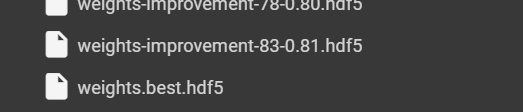

- Best



---



3.6) Load a saved Neural Network model


In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# load weights
model.load_weights("weights.best.hdf5")

# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



---



3.7) Visualize Model Training History in Keras


In [ ]:
# MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

# define model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file while skipping the first row
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---



3.8) Show the application of Dropout Regularization


```
# This is formatted as code
```



In [ ]:
!pip install scikeras

In [ ]:
dataset = np.loadtxt("HeartDisease.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:11]
Y = dataset[:, 11]

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("HeartDisease.csv", header=None, delimiter=",", skiprows=1)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)



In [ ]:
# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(11,), activation='relu'))
	model.add(Dense(30,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))

	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

In [ ]:

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



---



3.9) Show the application of Dropout on the visible layer


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("HeartDisease.csv", header=None, delimiter=",", skiprows=1)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(11,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



---



3.10) Show the application of Dropout on the hidden layer


In [ ]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("HeartDisease.csv", header=None, delimiter=",", skiprows=1)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(11,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



---



3.11) Show the application of a time-based learning rate schedule


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# load dataset
dataframe = read_csv("HeartDisease.csv", header=None, delimiter=",", skiprows=1)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:, 0:11].astype(float)
Y = dataset[:, 11]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Input(shape=(11,)))  # Use Input(shape=(11,))
model.add(Dense(34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, encoded_Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)




---



3.12) Show the application of a drop-based learning rate schedule


In [ ]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
dataframe = read_csv("HeartDisease.csv", header=None, delimiter=",", skiprows=1)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_shape=(11,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)



---



# Summary and Lessons Learned

**Summary:**

In doing this assignment where we are tasked to: It is also possible to save models in a number of formats. Checkpoints should be set to establish which of the neural network should be selected and which should be considered for improvement before reloading it. Applying dropout selects a subset of neurons for the current processing step in both the visible layer and the hidden layer. Next, implement time-based learning rate schedule and then drop-based learning rate schedule. These are all the things that I have done in this assignment with the help of our module and notebook. Regarding this assignment, I have realized that choosing a dataset is a crucial step and is likely to affect the accuracy of your model. In conclusion, I have been able to learn a number of things whenever it comes to saving a model in this assignment.

---

**Lessons Learned:**

If models have to be saved in HDF5, JSON, YAML, or Keras then checkpoints can be used to enhance the saved models and to know which model is the best among them the saved models can be loaded. Use dropout in visible layer and hidden layer of the network. Equally use time-based learning rate schedule and drop-based learning rate schedule.